# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<a id="1"></a>
# 1. Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
# функция для выведения данных для анализа датафреймов
def research(data):

    display(data.head())
    print(data.info()) 
    display(data.describe())
    print('дубликаты', geo_data_1.duplicated().sum())

<a id="11"></a>
#### Регион 0

In [ ]:
research(geo_data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


дубликаты 0


<a id="12"></a>
#### Регион 1

In [ ]:
research(geo_data_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


дубликаты 0


<a id="13"></a>
#### Регион 2

In [ ]:
research(geo_data_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


дубликаты 0


### Вывод:  
* Дубликатов нет, 
* id не несет нужной для расчетов информации, можно удалить
* Есть 0 значения product, необходимо проанализировать
    

Избавимся от столбцов id, так как они имеют для модели пользы

In [ ]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

<a id="14"></a>
#### Нулевые значения product

In [ ]:
print(geo_data_0[geo_data_0['product'] == 0]['product'].count())
print(geo_data_1[geo_data_1['product'] == 0]['product'].count())
print(geo_data_2[geo_data_2['product'] == 0]['product'].count())

1
8235
1


In [ ]:
print(len(geo_data_0['product'].unique()))
print(len(geo_data_1['product'].unique()))
print(len(geo_data_2['product'].unique()))

100000
12
100000


In [ ]:
geo_data_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

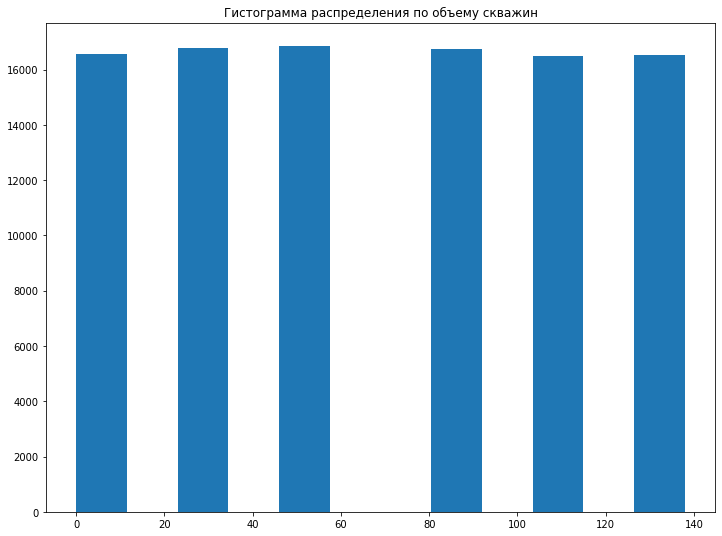

In [ ]:

plt.figure(figsize=[12,9])
plt.hist(geo_data_1['product'], bins = 12)
plt.title("Гистограмма распределения по объему скважин")
plt.show()

### Вывод
Большое количество нулевых значений, равное распределение и малая вариабельность данных: возможно данные подверглись вручную категоризации, и вследствие этого получилось большое количество нулевых значений.  Нулевые значения нельзя заменить на среднее. В связи с большим количеством этих данных удалять тоже не стоит. 

<a id="2"></a>
# 2. Обучение и проверка модели

<a id="21"></a>
Для обучения модели подходит только линейная регрессия  
Напишем функцию: На вход она получает регион, делит его на признаки и целевой признак, разбивает данные на обучающую и валидационные выборки, делаем стандартизацию данных рассчитывает метрики RMSE.  
Так же рассчитаем среднее значение запасов месторождений в регионе

In [ ]:

def region_prediction(data):
   
    features = data.drop(["product"], axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lr = LinearRegression(normalize=False)
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))  
    stock_mean = data['product'].mean()
    stock_mean_pred = predictions.mean()
    return predictions, rmse, stock_mean, stock_mean_pred, target_valid.reset_index(drop=True)

In [ ]:
pred_0, rmse_0, stock_mean_0, stock_mean_pred_0, target_valid_0 = region_prediction(geo_data_0)
print('RMSE модели в регионе 0 = {:.3f}'.format(rmse_0))
print('Средний запас предсказанного сырья 0 = {:.3f} т. баррелей'.format(stock_mean_pred_0))

RMSE модели в регионе 0 = 37.579
Средний запас предсказанного сырья 0 = 92.593 т. баррелей


In [ ]:
pred_1, rmse_1, stock_mean_1, stock_mean_pred_1, target_valid_1 = region_prediction(geo_data_1)
print('RMSE модели в регионе 1 = {:.3f}'.format(rmse_1))
print('Средний запас предсказанного сырья 1 = {:.3f} т. баррелей'.format(stock_mean_pred_1))

RMSE модели в регионе 1 = 0.893
Средний запас предсказанного сырья 1 = 68.729 т. баррелей


In [ ]:
pred_2, rmse_2, stock_mean_2, stock_mean_pred_2, target_valid_2 = region_prediction(geo_data_2)
print('RMSE модели в регионе 2 = {:.3f}'.format(rmse_2))
print('Средний запас предсказанного сырья 2 = {:.3f} т. баррелей'.format(stock_mean_pred_2))

RMSE модели в регионе 2 = 40.030
Средний запас предсказанного сырья 2 = 94.965 т. баррелей


### Вывод:
Лучшие показатели RMSE модели в Регионе 1 (RMSE = 0.893), этот регион более предсказуем. Возможно это следствии явно отредактированных данных.  

Средний запас предсказанного сырья 1 = 68.729 т. баррелей, что меньше чем в двух других регионах(92.593  и 94.965)  
В этих регионах высокий показатель RMSE, что говорит о том что модель работает хуже, это дает более непредсказуемые результаты, RMSE для постоянного предсказания среднего таргета по Регионам = 44.67 и 44,66, соответственно)


<a id="3"></a>
# 3. Подготовка к расчёту прибыли

<a id="31"></a>
Сохраним ключевые значения для расчетов в отдельных переменных

In [ ]:
BUDGET = 10000000000 
BEST_WELLS = 200
BARREL_PROFIT = 450*1000
TOTAL_WELLS = 500 
RISK_LOSS = 0.025 

In [ ]:
DRILLING_COST = BUDGET/BEST_WELLS
print('Бюджет бурения одного месторождения, руб:', DRILLING_COST)

Бюджет бурения одного месторождения, руб: 50000000.0


In [ ]:
print('Объём сырья для безубыточной разработки новой скважины  = {:.3f} т. баррелей'.format(DRILLING_COST / BARREL_PROFIT))

Объём сырья для безубыточной разработки новой скважины  = 111.111 т. баррелей


In [ ]:
print('Средний запас сырья региона 0 = {:.3f} т. баррелей'.format(stock_mean_0))
print('Средний запас сырья региона 1 = {:.3f} т. баррелей'.format(stock_mean_1))
print('Средний запас сырья региона 2 = {:.3f} т. баррелей'.format(stock_mean_2))

Средний запас сырья региона 0 = 92.500 т. баррелей
Средний запас сырья региона 1 = 68.825 т. баррелей
Средний запас сырья региона 2 = 95.000 т. баррелей


### Вывод:  
* Средний запас сырья в скважинах меньше, чем необходимый объем сырья для безубыточности.  
* Необходимо для безубыточной разработки новой скважины  = 111.111 т. баррелей
* Необходимо разрабатывать только перспективные скважины

<a id="4"></a>
# 4. Расчёт прибыли и рисков 

<a id="41"></a>
#### Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [ ]:
def profit(prediction, target):
    data = pd.concat([prediction, target],axis=1)
    data.columns = ['prediction','target']
    data = data.sort_values(by = 'prediction', ascending = False)[:BEST_WELLS]
    return (data['target'].sum() * BARREL_PROFIT - BUDGET)



In [ ]:
revenue_0 = profit(pred_0, target_valid_0)

print('Прибыль для полученного объёма сырья региона 0 = {} млн. руб'.format(revenue_0  / 10e6))

Прибыль для полученного объёма сырья региона 0 = 332.08260431398526 млн. руб


In [ ]:
revenue_0 = profit(pred_1, target_valid_1)

print('Прибыль для полученного объёма сырья региона 1 = {} млн. руб'.format(revenue_0 / 10e6))

Прибыль для полученного объёма сырья региона 1 = 241.5086696681511 млн. руб


In [ ]:
revenue_0 = profit(pred_2, target_valid_2)

print('Прибыль для полученного объёма сырья региона 2 = {} млн. руб'.format(revenue_0 / 10e6))

Прибыль для полученного объёма сырья региона 2 = 271.03499635998327 млн. руб


<a id="42"></a>
#### Функция для расчетов прибыли и рисков для каждого региона с применением техники Bootstrap 

In [ ]:
def estimate(prediction, target):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        values.append(profit(pred_subsample, target_subsample))
    values = pd.Series(values)
    mean = np.mean(values) / 10e6
    lower = values.quantile(0.025) / 10e6
    upper = values.quantile(0.975) / 10e6
    confidence_interval = (lower, upper)
    risk_of_loss = (values < 0).sum() / values.count()
    
    print('Средняя прибыль = {:.2f} млн.руб.'.format(mean))
    print('95% доверительный интервал от {:.2f} до {:.2f} млн.руб.'.format(lower, upper))
    print('Процент риска {:.1%}'.format(risk_of_loss))

#### Регион 0

In [ ]:
region_0 = estimate(pred_0, target_valid_0)

Средняя прибыль = 39.62 млн.руб.
95% доверительный интервал от -11.12 до 90.98 млн.руб.
Процент риска 6.9%


#### Регион 1

In [ ]:
region_1 = estimate(pred_1, target_valid_1)

Средняя прибыль = 45.60 млн.руб.
95% доверительный интервал от 3.38 до 85.23 млн.руб.
Процент риска 1.5%


#### Регион 2

In [ ]:
region_2 = estimate(pred_2, target_valid_2)

Средняя прибыль = 40.44 млн.руб.
95% доверительный интервал от -16.34 до 95.04 млн.руб.
Процент риска 7.6%


<a id="5"></a>
### Общий вывод
Изучили предоставленные данные трёх регионов, обучили модель линейной регрессии и сделали расчёт прибыли и рисков для каждого региона.  

Наиболее перспективный регион 1. Добыча нефти в этом регионе связана с наименьшим риском и предполагается получит наибольшую среднюю прибыль.   
Остальные регионы имеют вероятность убытков больше 2.5%, что не соответствует условию поставленной задачи.